<a href="https://www.kaggle.com/code/yaramahrous/lstm-timeseries?scriptVersionId=199762398" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_squared_log_error


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout,Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
def create_sequences(data, time_steps=60):
    x = [data[i:i + time_steps] for i in range(len(data) - time_steps)]
    y = [data[i + time_steps] for i in range(len(data) - time_steps)]
    return np.array(x), np.array(y)

In [31]:
df=pd.read_csv('/kaggle/input/nvidia-daily-stock-price-data/nvidia_stock_prices.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,2004-01-02,0.196417,0.199083,0.192333,0.192333,436416000
1,2004-01-05,0.195250,0.199917,0.193500,0.198583,575292000
2,2004-01-06,0.198000,0.209417,0.197083,0.206667,1093344000
3,2004-01-07,0.204333,0.209500,0.202917,0.208500,673032000
4,2004-01-08,0.211083,0.212083,0.207250,0.209250,433752000


In [32]:
df['Date'] = pd.to_datetime(df.Date)
df.set_index('Date',inplace=True)
df

,Open,High,Low,Close,Volume
Date,,,,,
2004-01-02,0.196417,0.199083,0.192333,0.192333,436416000
2004-01-05,0.195250,0.199917,0.193500,0.198583,575292000
2004-01-06,0.198000,0.209417,0.197083,0.206667,1093344000
2004-01-07,0.204333,0.209500,0.202917,0.208500,673032000
2004-01-08,0.211083,0.212083,0.207250,0.209250,433752000
...,...,...,...,...,...
2023-12-22,49.195000,49.382999,48.466999,48.830002,252507000
2023-12-26,48.967999,49.599998,48.959999,49.278999,244200000
2023-12-27,49.511002,49.680000,49.084999,49.417000,233648000


In [33]:
df.describe()

,Open,High,Low,Close,Volume
count,5033.000000,5033.000000,5033.000000,5033.000000,5.033000e+03
mean,5.214671,5.308604,5.117086,5.217039,5.587962e+08
std,9.643976,9.811276,9.465058,9.644928,3.363408e+08
min,0.080583,0.083917,0.077500,0.078583,4.564400e+07
25%,0.344000,0.349000,0.336500,0.343250,3.482920e+08
50%,0.544000,0.552750,0.532500,0.542000,4.910920e+08
75%,5.233750,5.296500,5.125000,5.229000,6.816760e+08
max,50.216000,50.548000,49.411999,50.409000,5.088948e+09


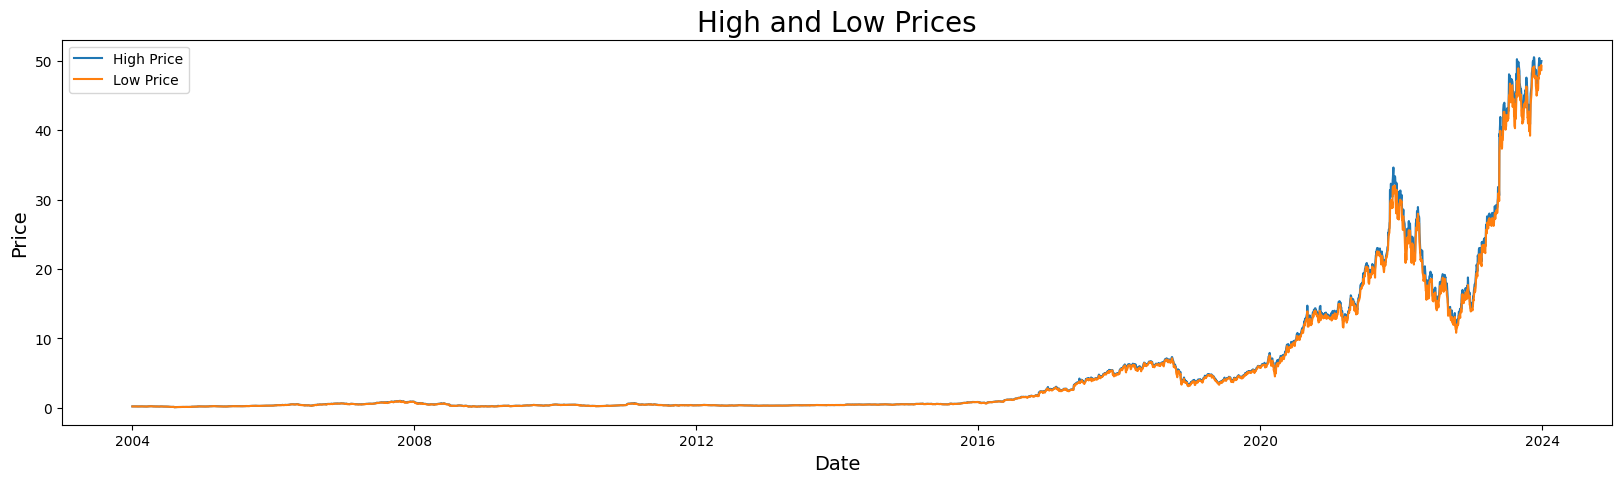

In [6]:
plt.figure(figsize=(20, 5))
plt.plot(df['High'], label='High Price')
plt.plot(df['Low'], label='Low Price')
plt.title('High and Low Prices', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend(loc='best') 

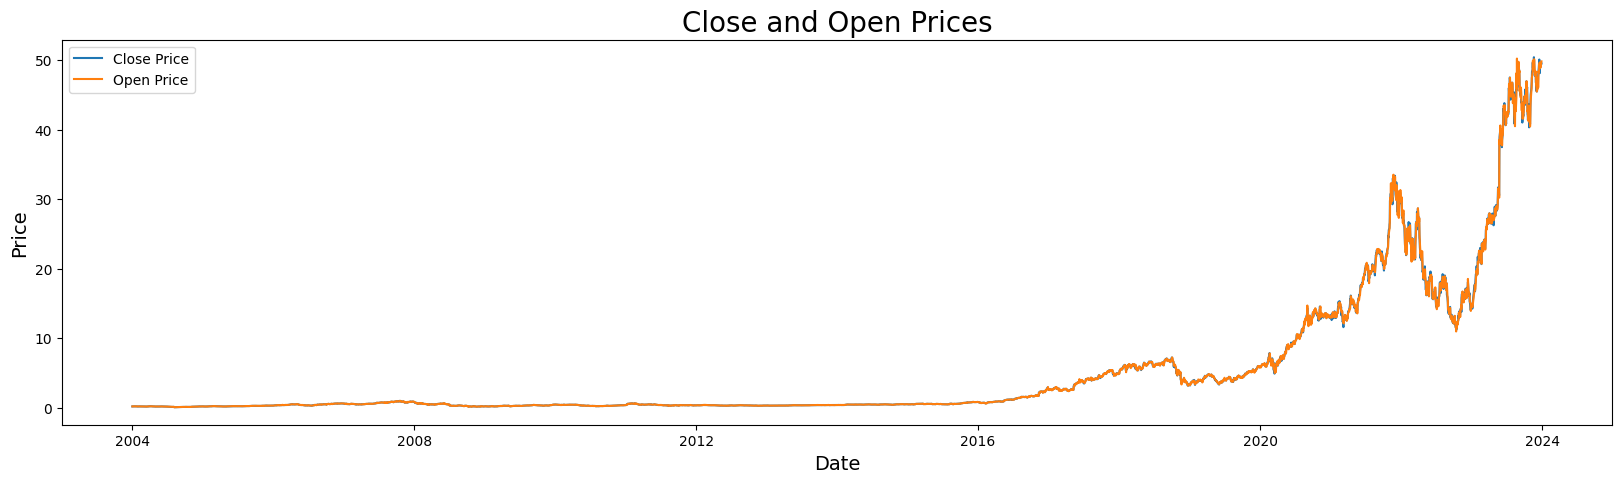

In [7]:
plt.figure(figsize=(20, 5))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['Open'], label='Open Price')
plt.title('Close and Open Prices', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend(loc='best') 

Text(0, 0.5, 'Volume')

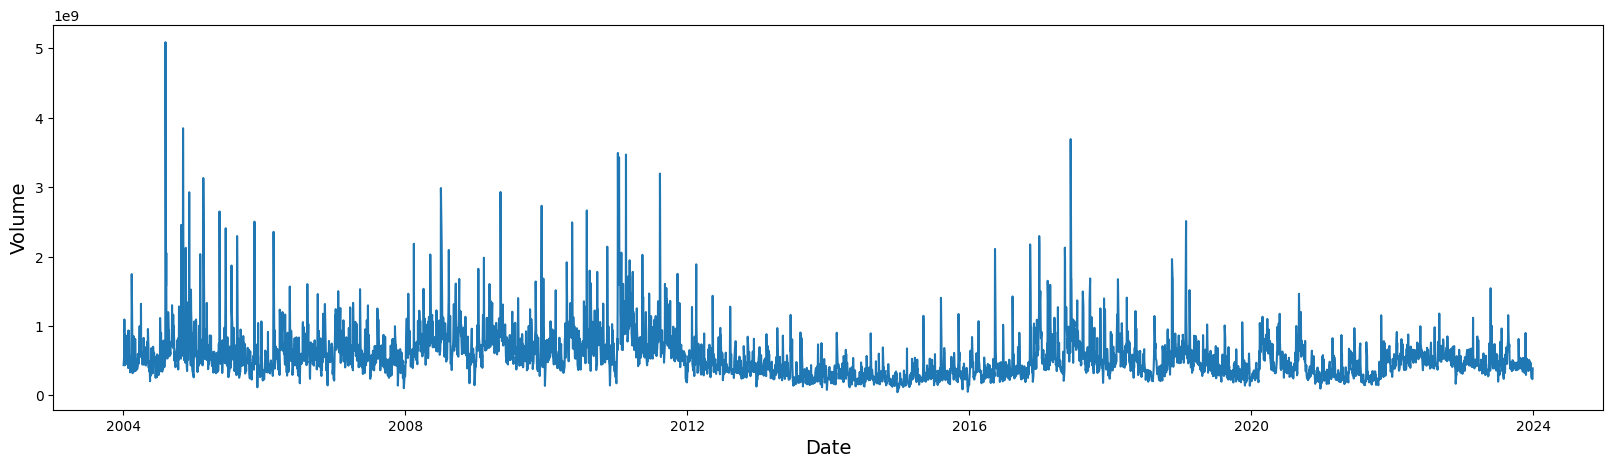

In [8]:
plt.figure(figsize=(20, 5))
plt.plot(df['Volume'])
plt.xlabel('Date', fontsize=14)
plt.ylabel('Volume', fontsize=14)

In [34]:
df_univariate = df[['Close']]

In [35]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df_univariate)
x, y = create_sequences(df_scaled)

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=False)

In [37]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3978, 60, 1), (995, 60, 1), (3978, 1), (995, 1))

In [39]:
early_stop = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [57]:
model = Sequential([
    Input(shape= (x_train.shape[1], 1)),
    LSTM(units=100),
    Dropout(0.25),
    Dense(1),
])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [59]:
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_split = 0.1 ,callbacks = [early_stop],verbose=2)

Epoch 1/30
112/112 - 6s - 58ms/step - loss: 5.5774e-05 - val_loss: 3.4471e-05
Epoch 2/30
112/112 - 5s - 43ms/step - loss: 1.0761e-05 - val_loss: 5.0970e-05
Epoch 3/30
112/112 - 4s - 39ms/step - loss: 7.6339e-06 - val_loss: 4.5470e-05
Epoch 4/30
112/112 - 4s - 39ms/step - loss: 6.4663e-06 - val_loss: 2.8124e-05
Epoch 5/30
112/112 - 4s - 39ms/step - loss: 7.1455e-06 - val_loss: 3.3978e-05
Epoch 6/30
112/112 - 4s - 39ms/step - loss: 7.2467e-06 - val_loss: 2.6674e-05
Epoch 7/30
112/112 - 4s - 39ms/step - loss: 7.3954e-06 - val_loss: 6.1288e-05
Epoch 8/30
112/112 - 4s - 39ms/step - loss: 6.1742e-06 - val_loss: 2.7870e-05
Epoch 9/30
112/112 - 5s - 42ms/step - loss: 8.5825e-06 - val_loss: 2.3284e-05
Epoch 10/30
112/112 - 4s - 40ms/step - loss: 6.0254e-06 - val_loss: 2.9068e-05
Epoch 11/30
112/112 - 4s - 40ms/step - loss: 5.6951e-06 - val_loss: 1.9933e-05
Epoch 12/30
112/112 - 4s - 40ms/step - loss: 6.4309e-06 - val_loss: 2.9252e-05
Epoch 13/30
112/112 - 4s - 39ms/step - loss: 7.9061e-06 - val

<Axes: >

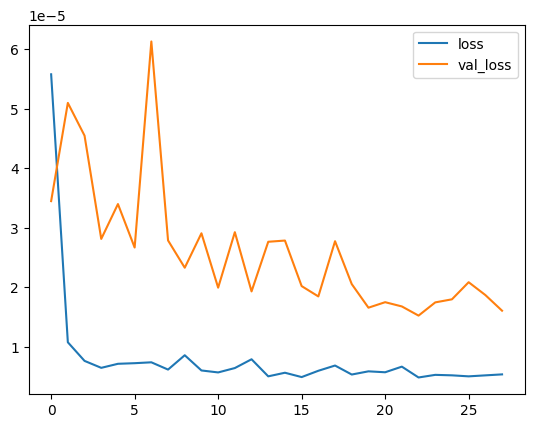

In [60]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [61]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

actual_prices = scaler.inverse_transform(y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


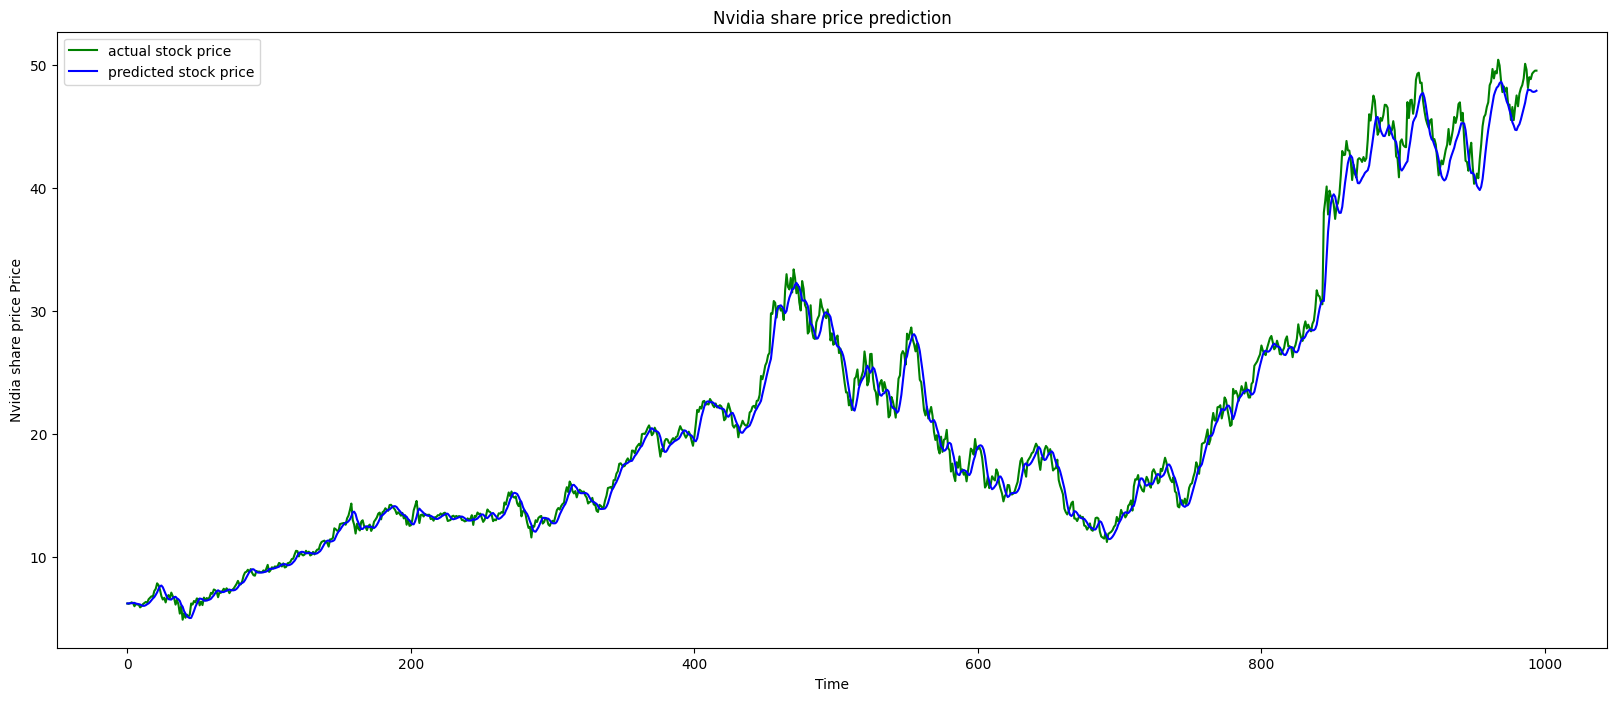

In [62]:
plt.figure(figsize= (20,8))
plt.plot(actual_prices, color = 'green', label = 'actual stock price')
plt.plot(predictions, color = 'blue', label = 'predicted stock price')
plt.title('Nvidia share price prediction')
plt.xlabel('Time')
plt.ylabel('Nvidia share price Price')
plt.legend()
plt.show()

In [63]:
test_results = pd.DataFrame({
    'Actual': actual_prices.flatten(),
    'Predicted': predictions.flatten()
}, index=pd.date_range(start=df.index[-len(actual_prices)] + pd.DateOffset(1), periods=len(actual_prices), freq='ME'))

test_results

,Actual,Predicted
2020-01-31,6.232000,6.228160
2020-02-29,6.198500,6.244188
2020-03-31,6.252750,6.244864
2020-04-30,6.321500,6.250772
2020-05-31,6.262000,6.271534
...,...,...
2102-07-31,48.830002,47.928623
2102-08-31,49.278999,47.820145
2102-09-30,49.417000,47.793270
2102-10-31,49.521999,47.820629


In [64]:
mse = mean_squared_error(actual_prices, predictions)
mae = mean_absolute_error(actual_prices, predictions)
rmse = np.sqrt(mse)
rlmse=mean_squared_log_error(actual_prices, predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Root Mean Squared log Error: {rlmse}')

Mean Squared Error: 1.2313202251066655
Mean Absolute Error: 0.7693597247253113
Root Mean Squared Error: 1.1096486944554413
Root Mean Squared log Error: 0.0019079583091674982


# Multivariate

In [65]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)
x, y = create_sequences(df_scaled)

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=False)

In [67]:
model = Sequential([
    Input(shape= (x_train.shape[1], x_train.shape[2])),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(y_train.shape[1]),
])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 60, 50)         │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,655 (123.65 KB)

 Trainable params: 31,655 (123.65 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [26]:
model.hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_split = 0.1 ,verbose=2)

Epoch 1/10
112/112 - 9s - 78ms/step - loss: 0.0011 - val_loss: 5.0001e-04
Epoch 2/10
112/112 - 5s - 46ms/step - loss: 8.5882e-04 - val_loss: 4.3515e-04
Epoch 3/10
112/112 - 5s - 48ms/step - loss: 8.0869e-04 - val_loss: 4.3273e-04
Epoch 4/10
112/112 - 5s - 46ms/step - loss: 7.8764e-04 - val_loss: 4.5785e-04
Epoch 5/10
112/112 - 5s - 47ms/step - loss: 7.6320e-04 - val_loss: 3.9606e-04
Epoch 6/10
112/112 - 5s - 47ms/step - loss: 7.4410e-04 - val_loss: 3.5377e-04
Epoch 7/10
112/112 - 5s - 47ms/step - loss: 7.3882e-04 - val_loss: 3.5575e-04
Epoch 8/10
112/112 - 5s - 47ms/step - loss: 7.1406e-04 - val_loss: 3.7620e-04
Epoch 9/10
112/112 - 6s - 49ms/step - loss: 7.1103e-04 - val_loss: 3.9993e-04
Epoch 10/10
112/112 - 5s - 47ms/step - loss: 7.0019e-04 - val_loss: 4.5019e-04


<Axes: >

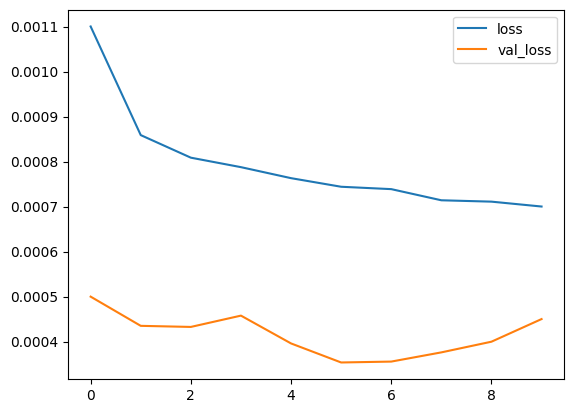

In [27]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [28]:
predictions = model.predict(x_test.flatten())

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


In [29]:
test_results = pd.DataFrame({
    'Actual': y_test.flatten(),
    'Predicted': predictions.flatten()
})

test_results

,Actual,Predicted
0,0.122905,0.122101
1,0.122188,0.121354
2,0.123783,0.117489
3,0.122260,0.120635
4,0.041272,0.084579
...,...,...
4970,0.991962,0.692445
4971,0.989081,0.699962
4972,0.986602,0.693420
4973,0.982376,0.672736


In [30]:
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)
rlmse=mean_squared_log_error(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Root Mean Squared log Error: {rlmse}')

Mean Squared Error: 0.010462679688382982
Mean Absolute Error: 0.06825857423662837
Root Mean Squared Error: 0.10228724108305484
Root Mean Squared log Error: 0.004148291576287506
